In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

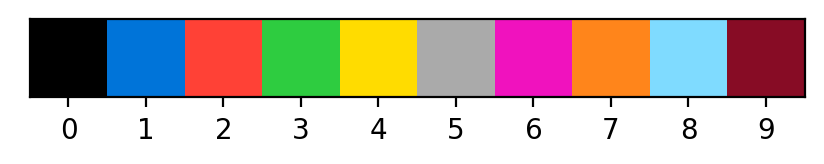

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
A=Trains[140]["train"][2]["input"]
B=Trains[140]["train"][2]["output"]

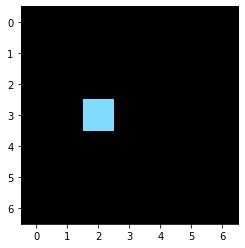

In [10]:
plot_picture(A)

In [37]:
def findmodemap(A,B):
    A_array=np.array(A)
    B_pad=np.pad(B,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    total_dict={}
    A1=A_pad.copy()
    A2=A_pad.copy()
    for k in range(30):
        dict1={}
        for i in range(m):
            for j in range(n):
                
                if A1[i,j]!=-1 and A1[i,j]!=0:
                    if str(A1[i-1:i+2,j-1:j+2]) not in dict1:
                        dict1[str(A1[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
                    if str(A1[i-1:i+2,j-1:j+2]) in dict1 and (dict1[str(A1[i-1:i+2,j-1:j+2])]!= B_pad[i-1:i+2,j-1:j+2]).any():
#                         print(A1[i-1:i+2,j-1:j+2],dict1[str(A1[i-1:i+2,j-1:j+2])],B_pad[i-1:i+2,j-1:j+2])
#                         return -1
                        dict1[str(A1[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]

        total_dict=dict(dict1,**total_dict)
        #print(total_dict)
        A1_copy=A1.copy()
        #A1_copy=A1
        for i in range(m):
            for j in range(n):
                
                if str(A1_copy[i-1:i+2,j-1:j+2]) in total_dict.keys():

                    
                    A2[i-1:i+2,j-1:j+2]=total_dict[str(A1_copy[i-1:i+2,j-1:j+2])]
                    
        
        #plot_picture(A2.tolist())
#         if (A1==B_pad).all():
#             #print(k)
#             break
#         else:
        A1=A2
        #plot_picture(A1.tolist())
            
            
    return total_dict
        


In [38]:
total_dict=findmodemap(A,B)
total_dict

{'[[-1 -1 -1]\n [-1  3  3]\n [-1  3  3]]': array([[-1, -1, -1],
        [-1,  3,  3],
        [-1,  3,  3]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 3  3  3]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 3,  3,  3]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 3  3  0]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 3,  3,  0]]),
 '[[-1 -1 -1]\n [ 3  3  0]\n [ 3  0  0]]': array([[-1, -1, -1],
        [ 3,  3,  0],
        [ 3,  0,  0]]),
 '[[-1  3  3]\n [-1  3  3]\n [-1  2  2]]': array([[-1,  3,  3],
        [-1,  3,  3],
        [-1,  2,  2]]),
 '[[3 3 3]\n [3 3 3]\n [2 2 2]]': array([[3, 3, 3],
        [3, 3, 3],
        [2, 2, 2]]),
 '[[3 3 3]\n [3 3 3]\n [2 2 0]]': array([[3, 3, 3],
        [3, 3, 3],
        [2, 2, 0]]),
 '[[3 3 3]\n [3 3 0]\n [2 0 0]]': array([[3, 3, 3],
        [3, 3, 0],
        [2, 0, 0]]),
 '[[-1  3  3]\n [-1  2  2]\n [-1  1  1]]': array([[-1,  3,  3],
        [-1,  2,  2],
        [-1,  1,  1]]),
 '[[3 3 3]\n [2 2 2]\n [1 1 1]]': array([[3, 3, 3],
        [2, 

In [39]:
def usemodedict(A,total_dict):

    A_array=np.array(A)
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    total_dict=total_dict
    A1=A_pad.copy()
    A2=A_pad.copy()
    for k in range(100):
        A1_copy=A1.copy()
        for i in range(m):
            for j in range(n):
                if str(A1_copy[i-1:i+2,j-1:j+2]) in total_dict.keys():
                    #print(A1_copy[i-1:i+2,j-1:j+2])
                    
                    A2[i-1:i+2,j-1:j+2]=total_dict[str(A1_copy[i-1:i+2,j-1:j+2])]
            
        
        A1=A2
    return A2[1:-1,1:-1].tolist()

In [40]:
def Solve_mode_dict(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    for i in range(10):
        mask=False
        for j in range(len(Input)):
            if i in Test_Case and i  in Input[j] :
                mask=True
                break
            elif i not in Test_Case:
                mask=True
                break
        if mask==False:
            return -1
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if findmodemap(x,y)==-1:
            return -1
        else:
            total_dict=dict(total_dict,**(findmodemap(x,y)))
    for x, y in zip(Input,Output):
        if y!=usemodedict(x,total_dict):
            return -1

            
                
    return usemodedict(Test_Case,total_dict)

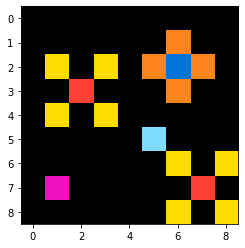

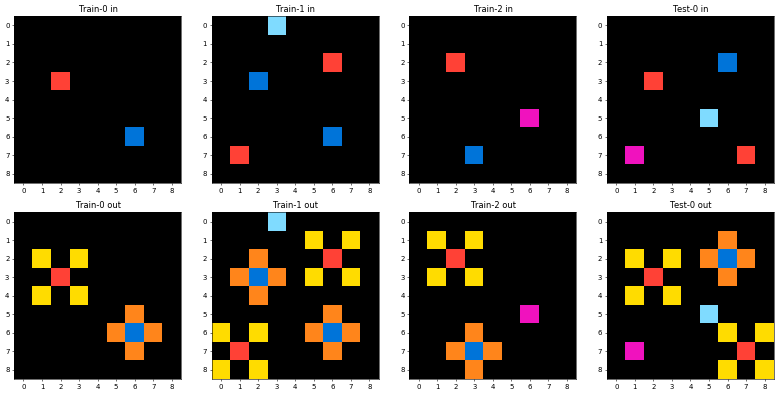

14


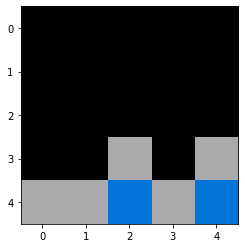

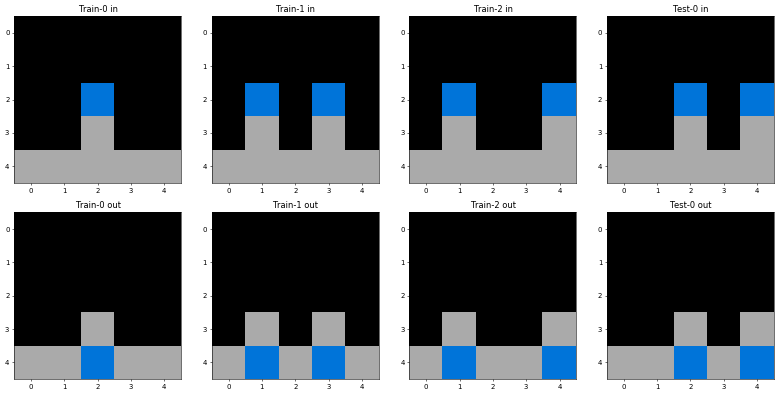

72


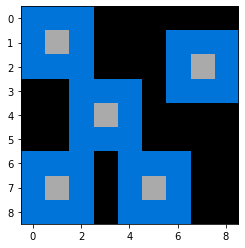

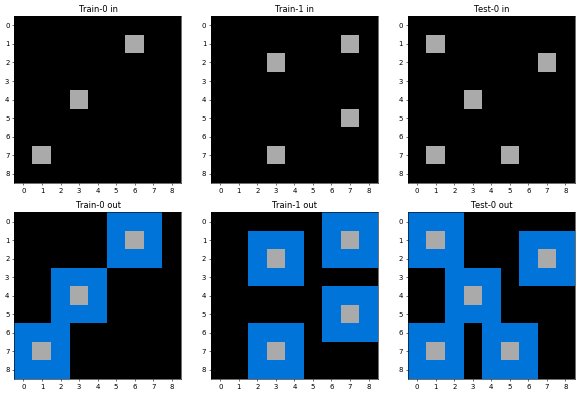

94


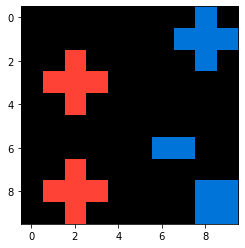

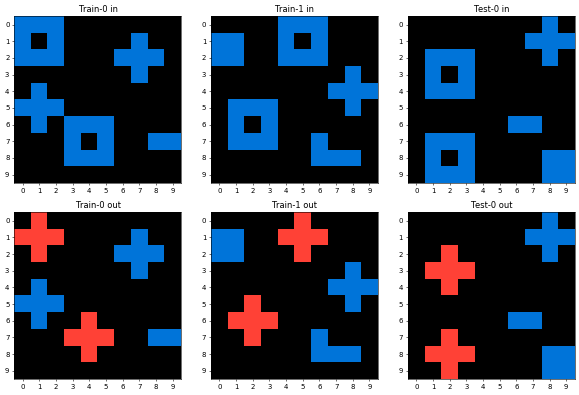

159


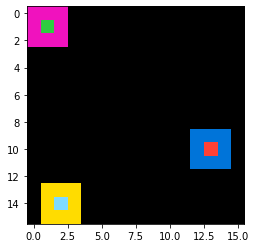

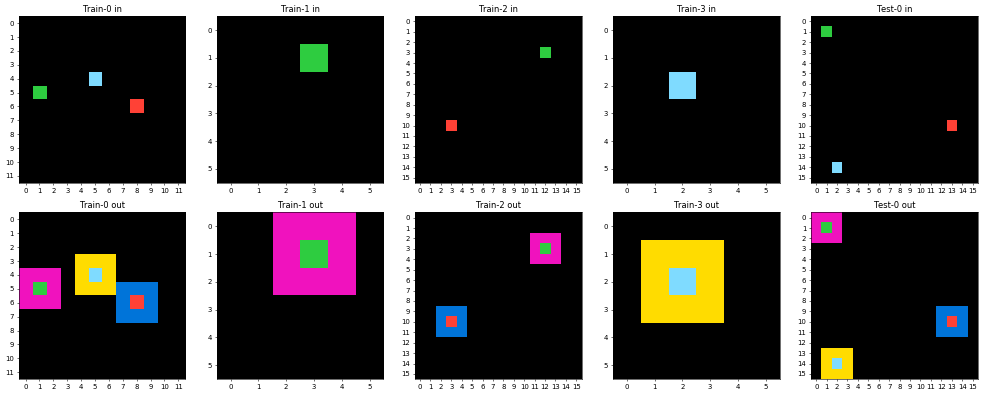

219


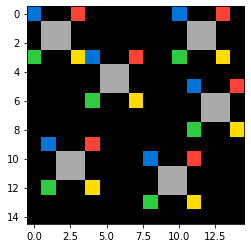

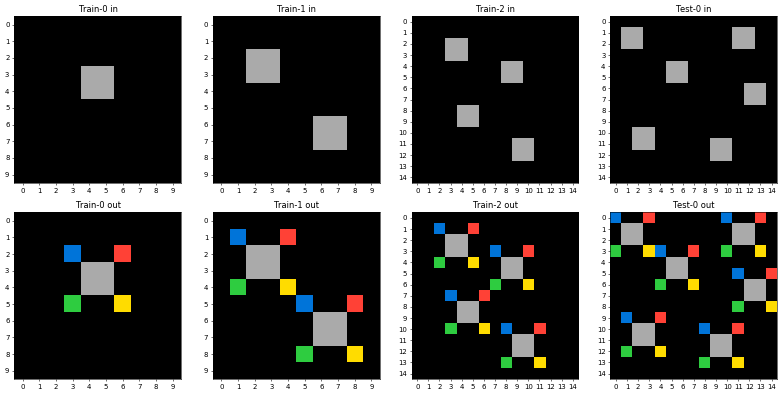

229


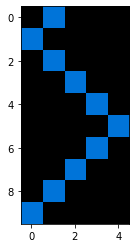

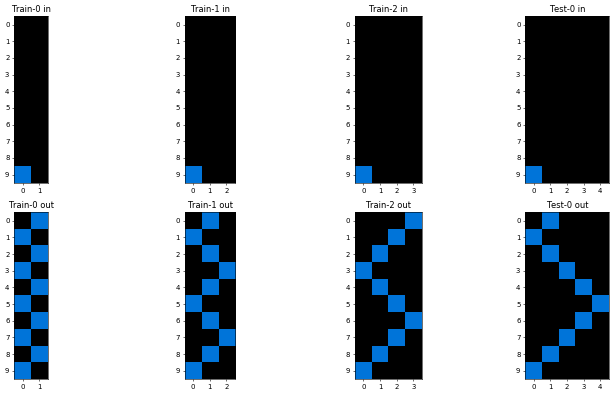

247


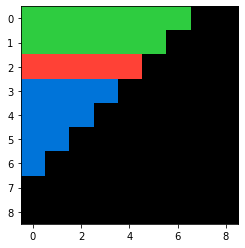

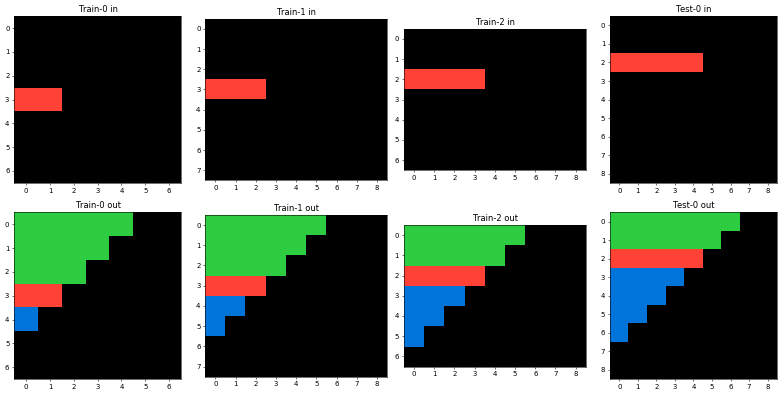

255


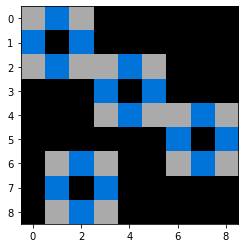

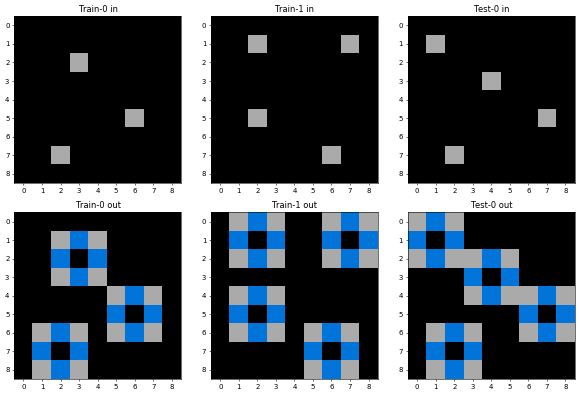

281


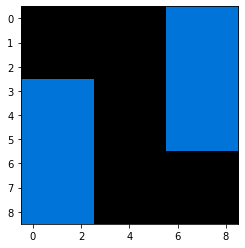

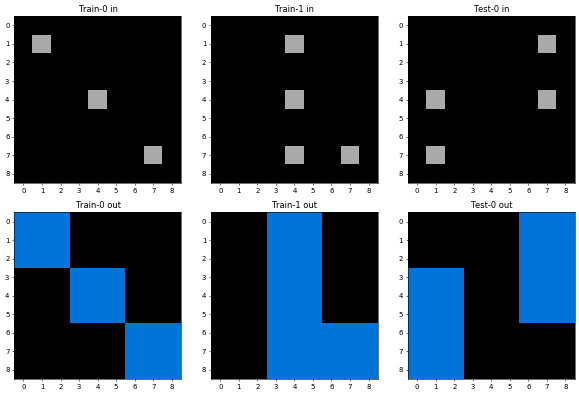

316


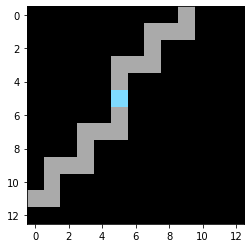

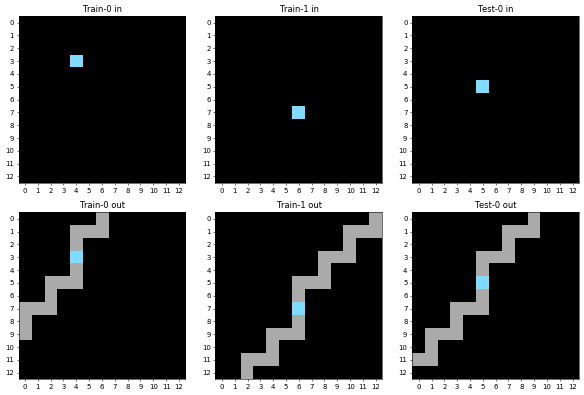

322


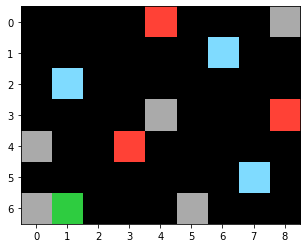

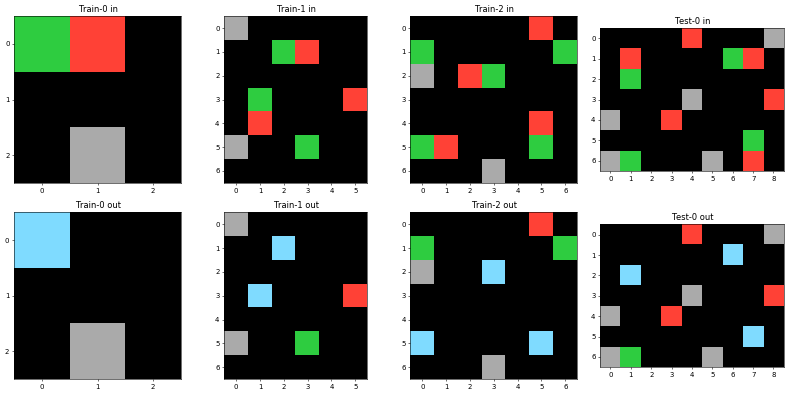

343


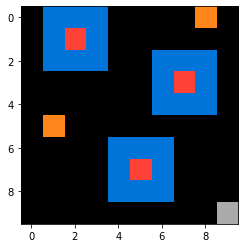

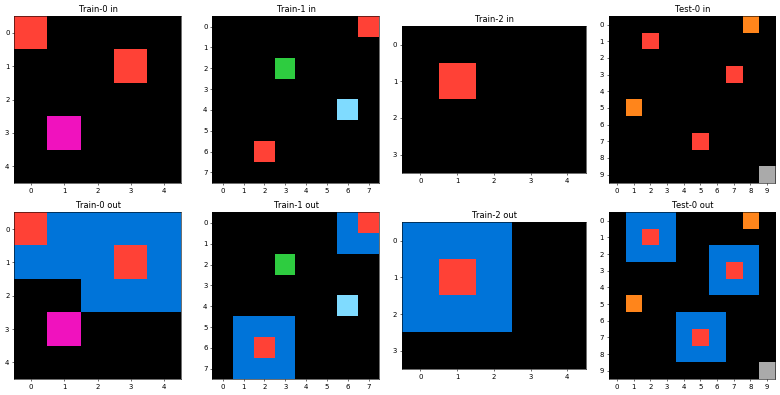

351


In [48]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict(basic_task)

        if a != -1 and task['test'][j]['output'] == a:
            plot_picture(a)
            plot_task(task)
            print(i)


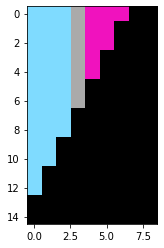

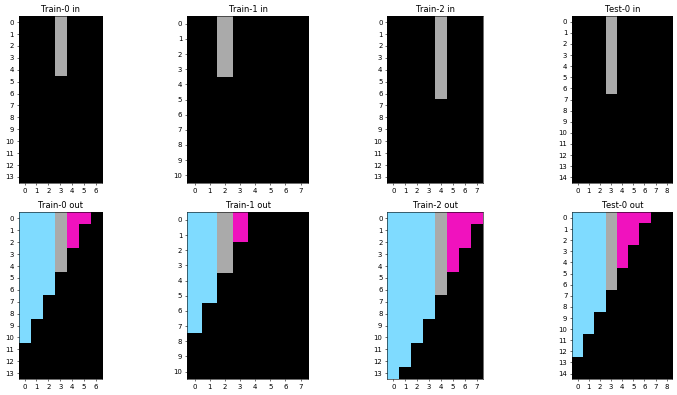

126


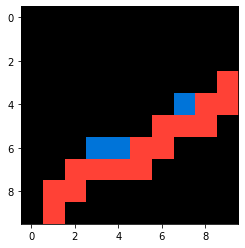

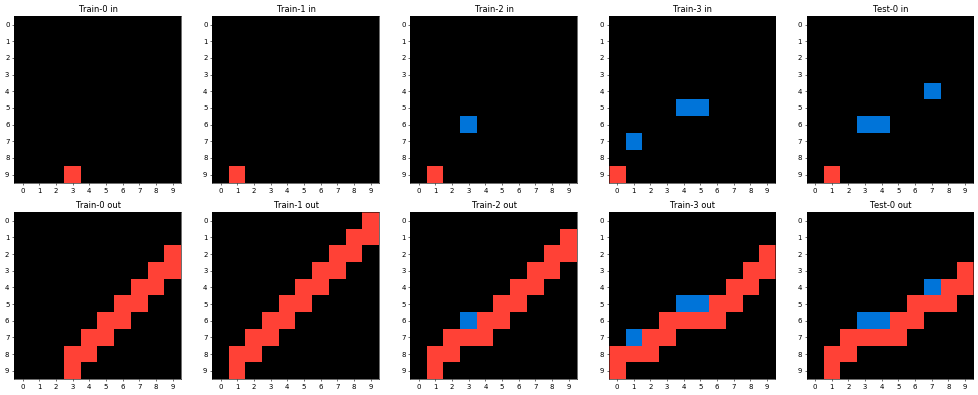

165


In [ ]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict(basic_task)

        if a != -1 and task['test'][j]['output'] == a:
            plot_picture(a)
            plot_task(task)
            print(i)

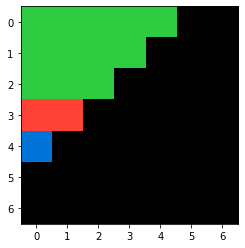

In [43]:
i=0
A=Trains[255]["train"][i]["input"]
B=Trains[255]["train"][i]["output"]
C=Trains[255]["test"][0]["input"]
plot_picture(B)

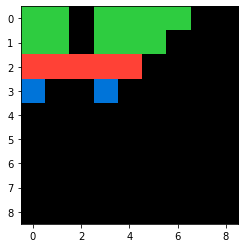

{'[[-1 -1 -1]\n [-1  3  3]\n [-1  3  3]]': array([[-1, -1, -1],
        [-1,  3,  3],
        [-1,  3,  3]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 3  3  3]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 3,  3,  3]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 3  3  0]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 3,  3,  0]]),
 '[[-1 -1 -1]\n [ 3  3  0]\n [ 3  0  0]]': array([[-1, -1, -1],
        [ 3,  3,  0],
        [ 3,  0,  0]]),
 '[[-1  3  3]\n [-1  3  3]\n [-1  3  3]]': array([[-1,  3,  3],
        [-1,  3,  3],
        [-1,  3,  3]]),
 '[[3 3 3]\n [3 3 3]\n [3 3 3]]': array([[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]),
 '[[3 3 3]\n [3 3 3]\n [3 3 0]]': array([[3, 3, 3],
        [3, 3, 3],
        [3, 3, 0]]),
 '[[3 3 3]\n [3 3 0]\n [3 0 0]]': array([[3, 3, 3],
        [3, 3, 0],
        [3, 0, 0]]),
 '[[-1  3  3]\n [-1  3  3]\n [-1  2  2]]': array([[-1,  3,  3],
        [-1,  3,  3],
        [-1,  2,  2]]),
 '[[3 3 3]\n [3 3 3]\n [2 2 0]]': array([[3, 3, 3],
        [3, 

In [47]:

# findmodemap(A,B)
total_dict=findmodemap(A,B)

res=usemodedict(C,total_dict)
plot_picture(res)
total_dict

In [67]:
A=Trains[175]["train"][1]["input"]
B=Trains[175]["train"][1]["output"]
C=Trains[175]["test"][0]["input"]
C_array=np.array(C)
# C_array[C_array==6]=8

res_array=np.array(res)
# res_array[res_array==8]=6
res_final=res_array.tolist()
plot_picture(res_final)

AttributeError: 'int' object has no attribute 'keys'

In [59]:
res_final==Trains[140]["test"][0]["output"]

True

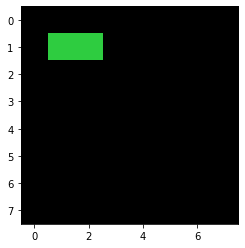

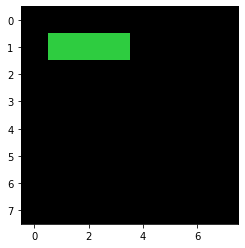

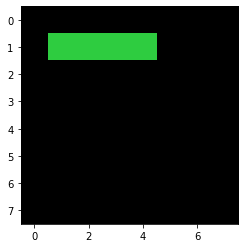

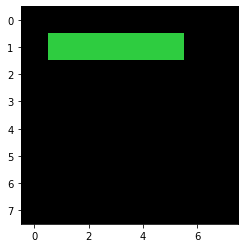

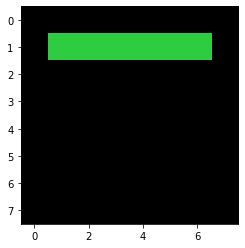

AttributeError: 'int' object has no attribute 'keys'

In [401]:
A=Trains[57]["train"][0]["input"]
B=Trains[57]["train"][0]["output"]
A[0][0]=B[0][0]
total_dict=findmodemap(A,B)
C=Trains[57]["test"][0]["input"]
C[0][0]=B[0][0]
C_array=np.array(C)

C1=C_array.tolist()
res=usemodedict(C1,total_dict)
res_array=np.array(res)

res_final=res_array.tolist()
plot_picture(res_final)

[[-1 -1 -1]
 [-1  3  0]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]


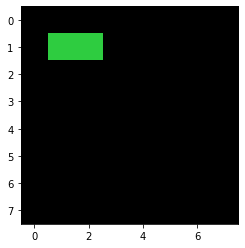

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  0]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  0]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  0]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  0]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]


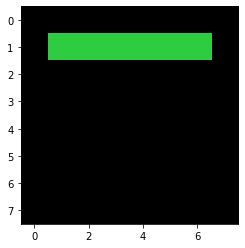

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]


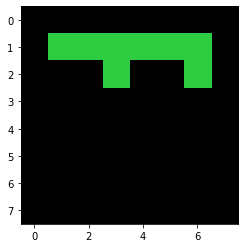

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]


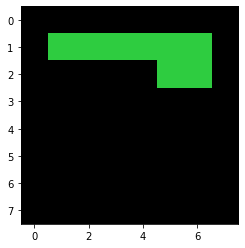

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  0 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]


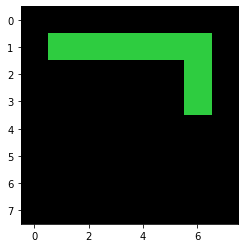

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  0 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  0 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  0 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]


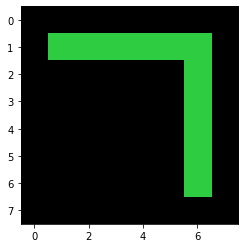

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [-1 -1 -1]] [[ 0  3 -1]
 [ 3  3 -1]
 [-1 -1 -1]]


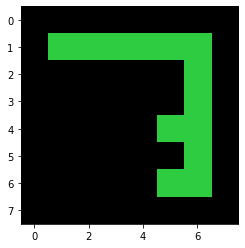

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]


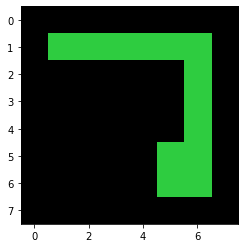

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[0 0 3]
 [0 3 3]
 [0 3 3]] [[3 0 3]
 [0 0 3]
 [3 3 3]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [-1 -1 -1]] [[ 0  3 -1]
 [ 3  3 -1]
 [-1 -1 -1]]


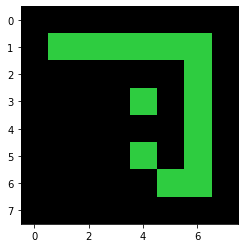

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[0 0 0]
 [0 3 0]
 [0 0 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [-1 -1 -1]] [[ 0  3 -1]
 [ 3  3 -1]
 [-1 -1 -1]]


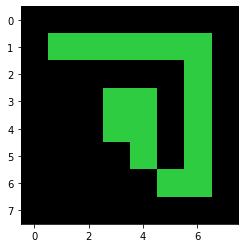

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[0 0 0]
 [0 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[3 3 0]
 [0 3 0]
 [0 0 3]] [[3 3 0]
 [0 0 0]
 [3 3 3]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [-1 -1 -1]] [[ 0  3 -1]
 [ 3  3 -1]
 [-1 -1 -1]]


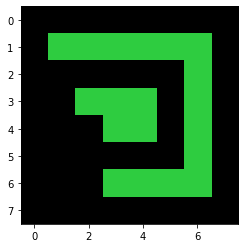

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[0 0 0]
 [0 3 3]
 [0 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 3  0  3]
 [ 0  3  3]
 [-1 -1 -1]]

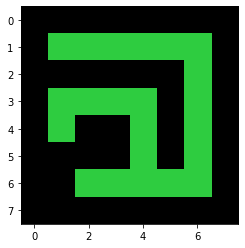

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 0]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  0  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[ 0  3 -1]
 [ 0  

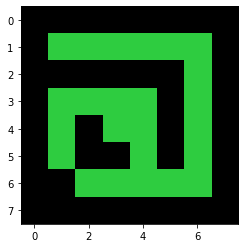

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 3]] [[3 3 3]
 [0 3 3]
 [0 0 0]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

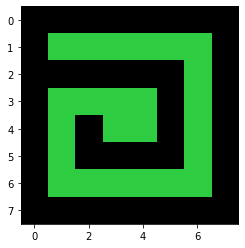

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

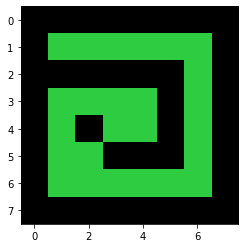

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  3]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

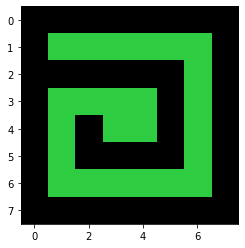

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

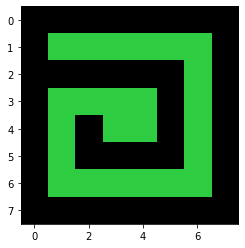

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

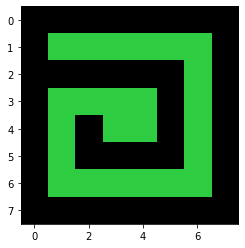

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

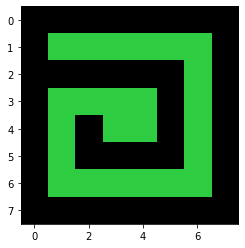

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

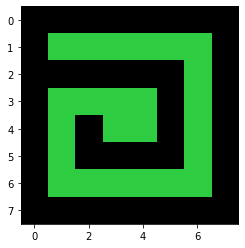

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

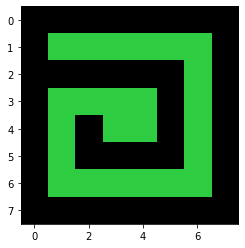

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

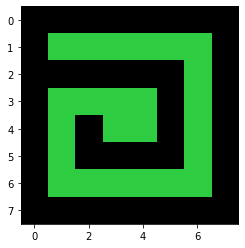

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

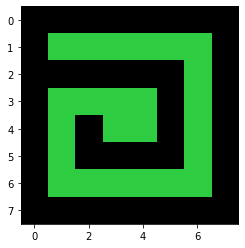

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

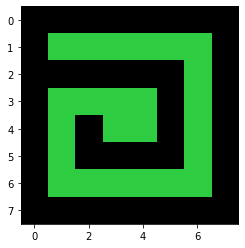

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

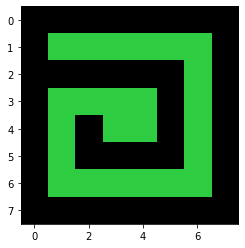

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

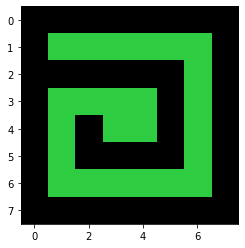

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

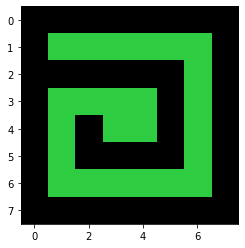

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

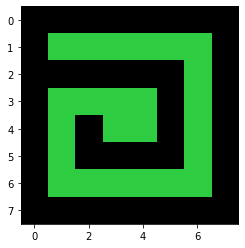

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

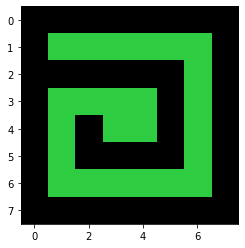

[[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]] [[-1 -1 -1]
 [-1  3  3]
 [-1  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  0]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3  3]
 [ 0  3  3]] [[-1 -1 -1]
 [ 3  3  3]
 [ 0  0  3]]
[[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]] [[-1 -1 -1]
 [ 3  3 -1]
 [ 0  3 -1]]
[[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 3  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]]
[[-1  0  0]
 [-1  3  3]
 [-1  3  0]] [[-1  0  0]
 [-1  3  3]
 [-1  3  0]]
[[0 0 0]
 [3 3 3]
 [3 0 3]] [[0 0 0]
 [3 3 3]
 [3 0 3]]
[[0 0 0]
 [3 3 3]
 [0 3 3]] [[0 0 0]
 [3 3 3]
 [0 3 3]]
[[0 0 0]
 [3 3 0]
 [3 3 0]] [[0 0 0]
 [3 3 0]
 [3 3 0]]
[[ 0  3 -1]
 [ 0  3 -1]
 [ 0  3 -1]] [[ 0  3 -1]
 [ 0  3 -1]
 [ 3  3 -1]]
[[-1  3  3]
 [-1  3  0]
 [-1  3  0]] [[-1  3  3]
 [-1  3  0]
 [-1  3  0]]
[[3 3 3]
 [0 3 3]
 [0 0 0]] [[3 3 3]
 [0 0 3]
 [3 0 3]]
[[ 0  3 -1]
 [ 3  3 -1]
 [ 0  3 -1]]

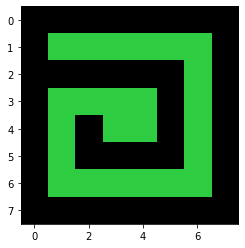

{'[[-1 -1 -1]\n [-1  3  3]\n [-1  0  0]]': array([[-1, -1, -1],
        [-1,  3,  3],
        [-1,  0,  0]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 0  0  0]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 0,  0,  3]]),
 '[[-1 -1 -1]\n [ 3  3  3]\n [ 0  0  3]]': array([[-1, -1, -1],
        [ 3,  3,  3],
        [ 0,  0,  3]]),
 '[[-1 -1 -1]\n [ 3  3 -1]\n [ 0  3 -1]]': array([[-1, -1, -1],
        [ 3,  3, -1],
        [ 0,  3, -1]]),
 '[[ 3  3 -1]\n [ 0  3 -1]\n [ 0  3 -1]]': array([[ 3,  3, -1],
        [ 0,  3, -1],
        [ 0,  3, -1]]),
 '[[-1  0  0]\n [-1  3  3]\n [-1  3  0]]': array([[-1,  0,  0],
        [-1,  3,  3],
        [-1,  3,  0]]),
 '[[0 0 0]\n [3 3 3]\n [3 0 3]]': array([[0, 0, 0],
        [3, 3, 3],
        [3, 0, 3]]),
 '[[0 0 0]\n [3 3 3]\n [0 3 3]]': array([[0, 0, 0],
        [3, 3, 3],
        [0, 3, 3]]),
 '[[0 0 0]\n [3 3 0]\n [3 3 0]]': array([[0, 0, 0],
        [3, 3, 0],
        [3, 3, 0]]),
 '[[ 0  3 -1]\n [ 0  3 -1]\n [ 0  3 -1]]': array([[ 0,  3, -1],


In [352]:
findmodemap(A,B)

In [153]:
A_array=np.array(A)
B_pad=np.pad(B,((1,1),(1,1)),"constant",constant_values=(-1,-1))
A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
A_pad

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

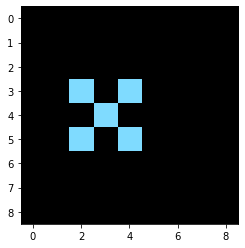

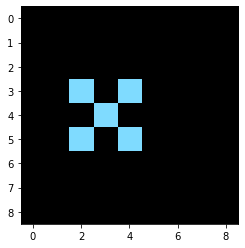

In [62]:
m,n=A_pad.shape
A1=A_pad.copy()
Dict1={}
for i in range(m):
    for j in range(n):
        if A_pad[i,j]!=-1 and A_pad[i,j]!=0:
            Dict1[str(A_pad[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
            
for i in range(m):
    for j in range(n):
        if str(A_pad[i-1:i+2,j-1:j+2]) in Dict1.keys():
            A1[i-1:i+2,j-1:j+2]=Dict1[str(A_pad[i-1:i+2,j-1:j+2])]
            plot_picture(A1.tolist())
plot_picture(A1.tolist())

{'[[0 0 0]\n [0 8 0]\n [0 0 8]]': array([[8, 0, 0],
       [0, 8, 0],
       [0, 0, 8]]), '[[0 0 0]\n [0 8 0]\n [8 0 0]]': array([[0, 0, 8],
       [0, 8, 0],
       [8, 0, 0]]), '[[8 0 8]\n [0 8 0]\n [8 0 8]]': array([[8, 0, 8],
       [0, 8, 0],
       [8, 0, 8]]), '[[0 0 8]\n [0 8 0]\n [0 0 0]]': array([[0, 0, 8],
       [0, 8, 0],
       [8, 0, 0]]), '[[8 0 0]\n [0 8 0]\n [0 0 0]]': array([[8, 0, 0],
       [0, 8, 0],
       [0, 0, 8]])}


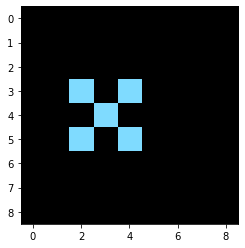

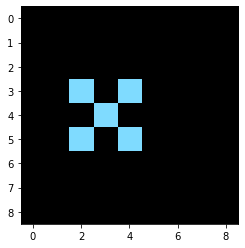

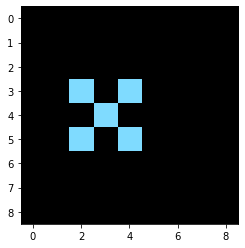

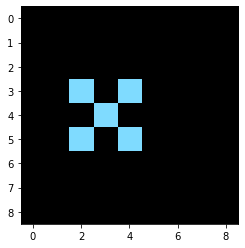

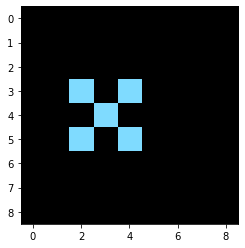

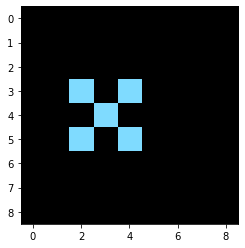

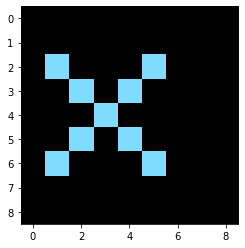

In [63]:
A2=A1.copy()
Dict2={}
for i in range(m):
    for j in range(n):
        if A1[i,j]!=-1 and A1[i,j]!=0:
            Dict2[str(A1[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
print(Dict2)
plot_picture(A1)
for i in range(m):
    for j in range(n):
        if str(A1[i-1:i+2,j-1:j+2]) in Dict2.keys():
            A2[i-1:i+2,j-1:j+2]=Dict2[str(A1[i-1:i+2,j-1:j+2])]
            plot_picture(A1)
            
plot_picture(A2.tolist())

{'[[-1  0  0]\n [-1  8  0]\n [-1  0  8]]': array([[-1,  0,  0],
       [-1,  8,  0],
       [-1,  0,  8]]), '[[0 0 0]\n [0 8 0]\n [8 0 0]]': array([[0, 0, 8],
       [0, 8, 0],
       [8, 0, 0]]), '[[8 0 0]\n [0 8 0]\n [0 0 8]]': array([[8, 0, 0],
       [0, 8, 0],
       [0, 0, 8]]), '[[0 0 8]\n [0 8 0]\n [8 0 0]]': array([[0, 0, 8],
       [0, 8, 0],
       [8, 0, 0]]), '[[8 0 8]\n [0 8 0]\n [8 0 8]]': array([[8, 0, 8],
       [0, 8, 0],
       [8, 0, 8]]), '[[-1  0  8]\n [-1  8  0]\n [-1  0  0]]': array([[-1,  0,  8],
       [-1,  8,  0],
       [-1,  0,  0]]), '[[8 0 0]\n [0 8 0]\n [0 0 0]]': array([[8, 0, 0],
       [0, 8, 0],
       [0, 0, 8]])}


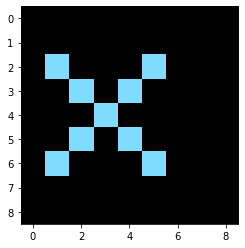

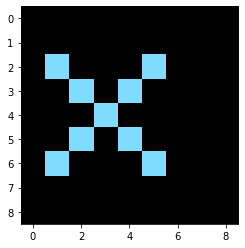

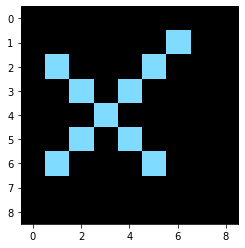

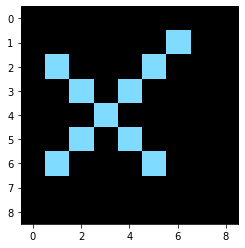

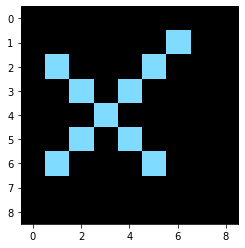

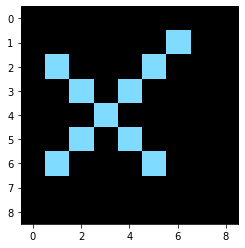

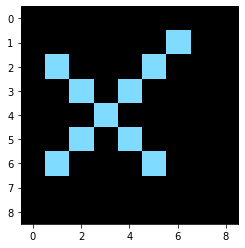

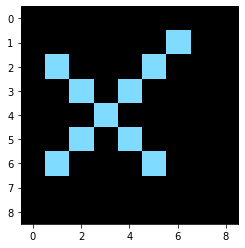

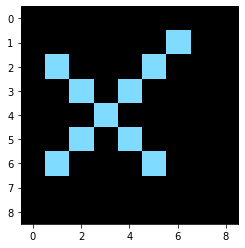

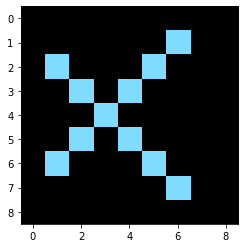

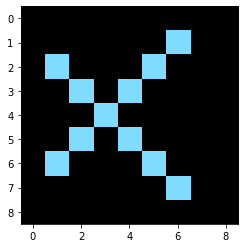

In [64]:
A3=A2.copy()
Dict3={}
for i in range(m):
    for j in range(n):
        if A2[i,j]!=-1 and A2[i,j]!=0:
            Dict3[str(A2[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
print(Dict3)
plot_picture(A2)
for i in range(m):
    for j in range(n):
        if str(A2[i-1:i+2,j-1:j+2]) in Dict3.keys():
            A3[i-1:i+2,j-1:j+2]=Dict3[str(A2[i-1:i+2,j-1:j+2])]
            plot_picture(A3)
            
plot_picture(A3.tolist())

In [65]:
A3[1:-1,1:-1]

array([[0, 0, 0, 0, 0, 8, 0],
       [8, 0, 0, 0, 8, 0, 0],
       [0, 8, 0, 8, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0],
       [0, 8, 0, 8, 0, 0, 0],
       [8, 0, 0, 0, 8, 0, 0],
       [0, 0, 0, 0, 0, 8, 0]])

In [70]:
Dict_all=dict(Dict1,**Dict2)

In [82]:
Dict_all=dict(Dict_all,**Dict3)
Dict_all

{'[[0 0 0]\n [0 8 0]\n [0 0 0]]': array([[8, 0, 8],
        [0, 8, 0],
        [8, 0, 8]]), '[[0 0 0]\n [0 8 0]\n [0 0 8]]': array([[8, 0, 0],
        [0, 8, 0],
        [0, 0, 8]]), '[[0 0 0]\n [0 8 0]\n [8 0 0]]': array([[0, 0, 8],
        [0, 8, 0],
        [8, 0, 0]]), '[[8 0 8]\n [0 8 0]\n [8 0 8]]': array([[8, 0, 8],
        [0, 8, 0],
        [8, 0, 8]]), '[[0 0 8]\n [0 8 0]\n [0 0 0]]': array([[0, 0, 8],
        [0, 8, 0],
        [8, 0, 0]]), '[[8 0 0]\n [0 8 0]\n [0 0 0]]': array([[8, 0, 0],
        [0, 8, 0],
        [0, 0, 8]]), '[[-1  0  0]\n [-1  8  0]\n [-1  0  8]]': array([[-1,  0,  0],
        [-1,  8,  0],
        [-1,  0,  8]]), '[[8 0 0]\n [0 8 0]\n [0 0 8]]': array([[8, 0, 0],
        [0, 8, 0],
        [0, 0, 8]]), '[[0 0 8]\n [0 8 0]\n [8 0 0]]': array([[0, 0, 8],
        [0, 8, 0],
        [8, 0, 0]]), '[[-1  0  8]\n [-1  8  0]\n [-1  0  0]]': array([[-1,  0,  8],
        [-1,  8,  0],
        [-1,  0,  0]])}

In [71]:
C=Trains[140]["train"][0]["input"]
D=Trains[140]["train"][0]["output"]

In [76]:
C_pad=np.pad(C,((1,1),(1,1)),"constant",constant_values=(-1,-1))

In [78]:
C_pad[C_pad==2]=8
C_pad

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

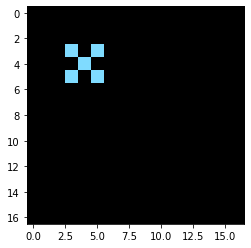

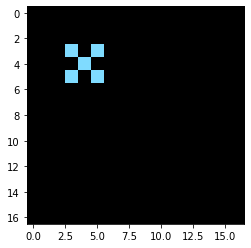

In [79]:
m,n=C_pad.shape
C1=C_pad.copy()
for i in range(m):
    for j in range(n):
        if str(C_pad[i-1:i+2,j-1:j+2]) in Dict1.keys():
            C1[i-1:i+2,j-1:j+2]=Dict1[str(C_pad[i-1:i+2,j-1:j+2])]
plot_picture(C1.tolist())

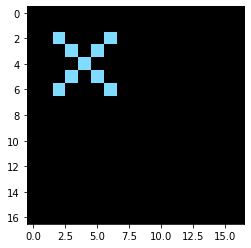

In [80]:
C2=C1.copy()
for i in range(m):
    for j in range(n):
        if str(C1[i-1:i+2,j-1:j+2]) in Dict2.keys():
            C2[i-1:i+2,j-1:j+2]=Dict2[str(C1[i-1:i+2,j-1:j+2])]
plot_picture(C2.tolist())

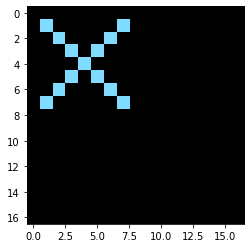

In [83]:

C3=C2.copy()
for i in range(m):
    for j in range(n):
        if str(C2[i-1:i+2,j-1:j+2]) in Dict_all.keys():
            C3[i-1:i+2,j-1:j+2]=Dict_all[str(C2[i-1:i+2,j-1:j+2])]
plot_picture(C3.tolist())

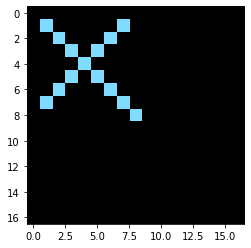

In [85]:

C4=C3.copy()
for i in range(m):
    for j in range(n):
        if str(C3[i-1:i+2,j-1:j+2]) in Dict_all.keys():
            C4[i-1:i+2,j-1:j+2]=Dict_all[str(C3[i-1:i+2,j-1:j+2])]
plot_picture(C4.tolist())